In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
# Loading data as cars
cars = pd.read_csv('E:/Analytics/DataCamp/Data Scientist/Datasets/Cars_Evaluation/mpg.csv')
print(cars.head())
print(cars.info())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [99]:
cars.dropna(axis=0,inplace=True)
cars.drop('name', axis='columns', inplace=True)
cars.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [100]:
cars.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [101]:
cars.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

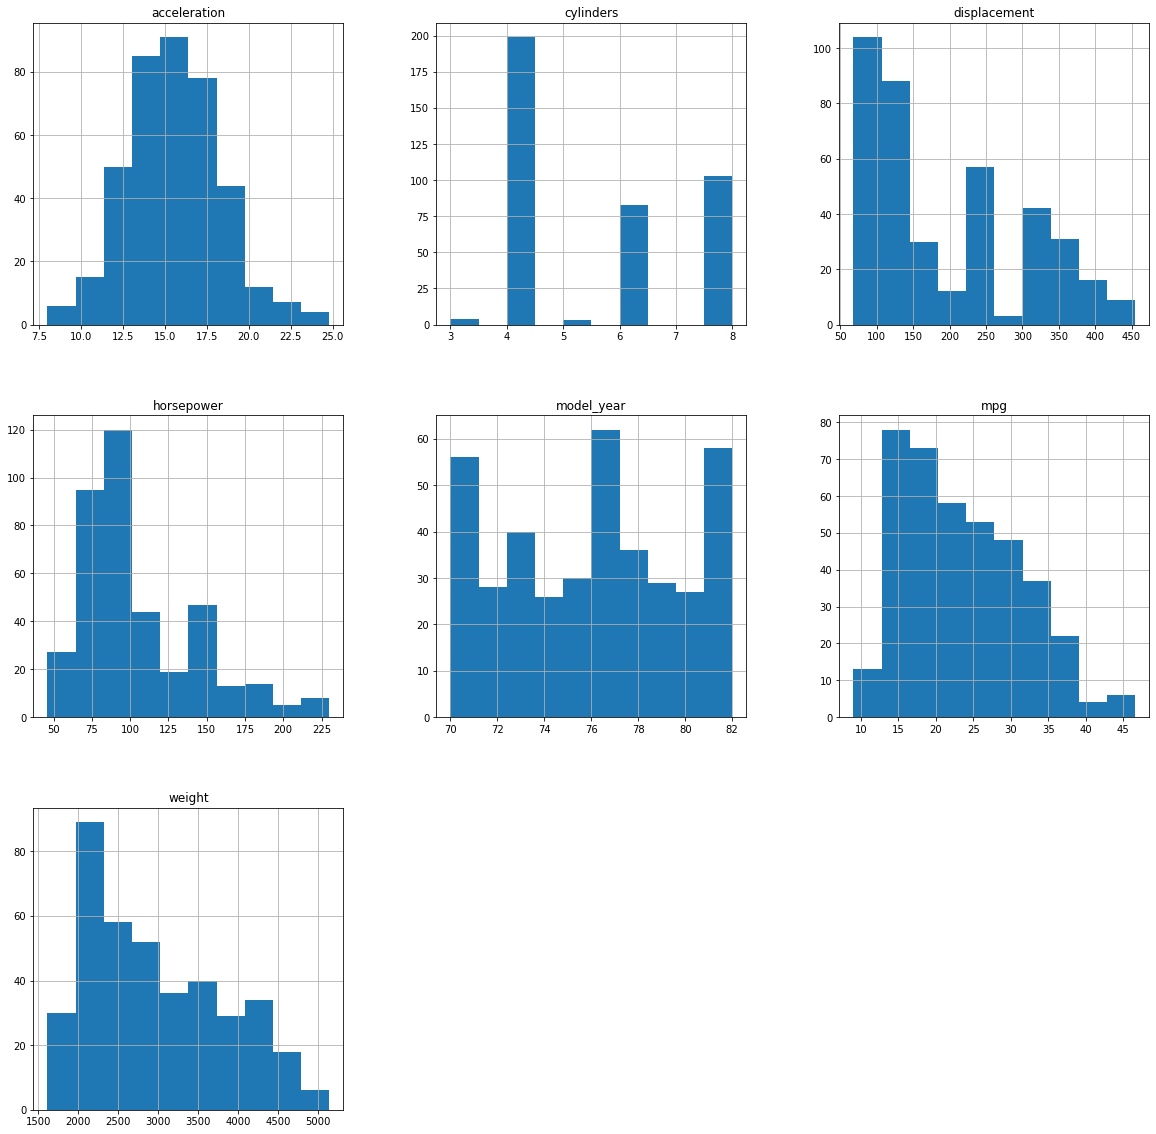

In [102]:
cars.hist(bins=10, figsize=(20,20));

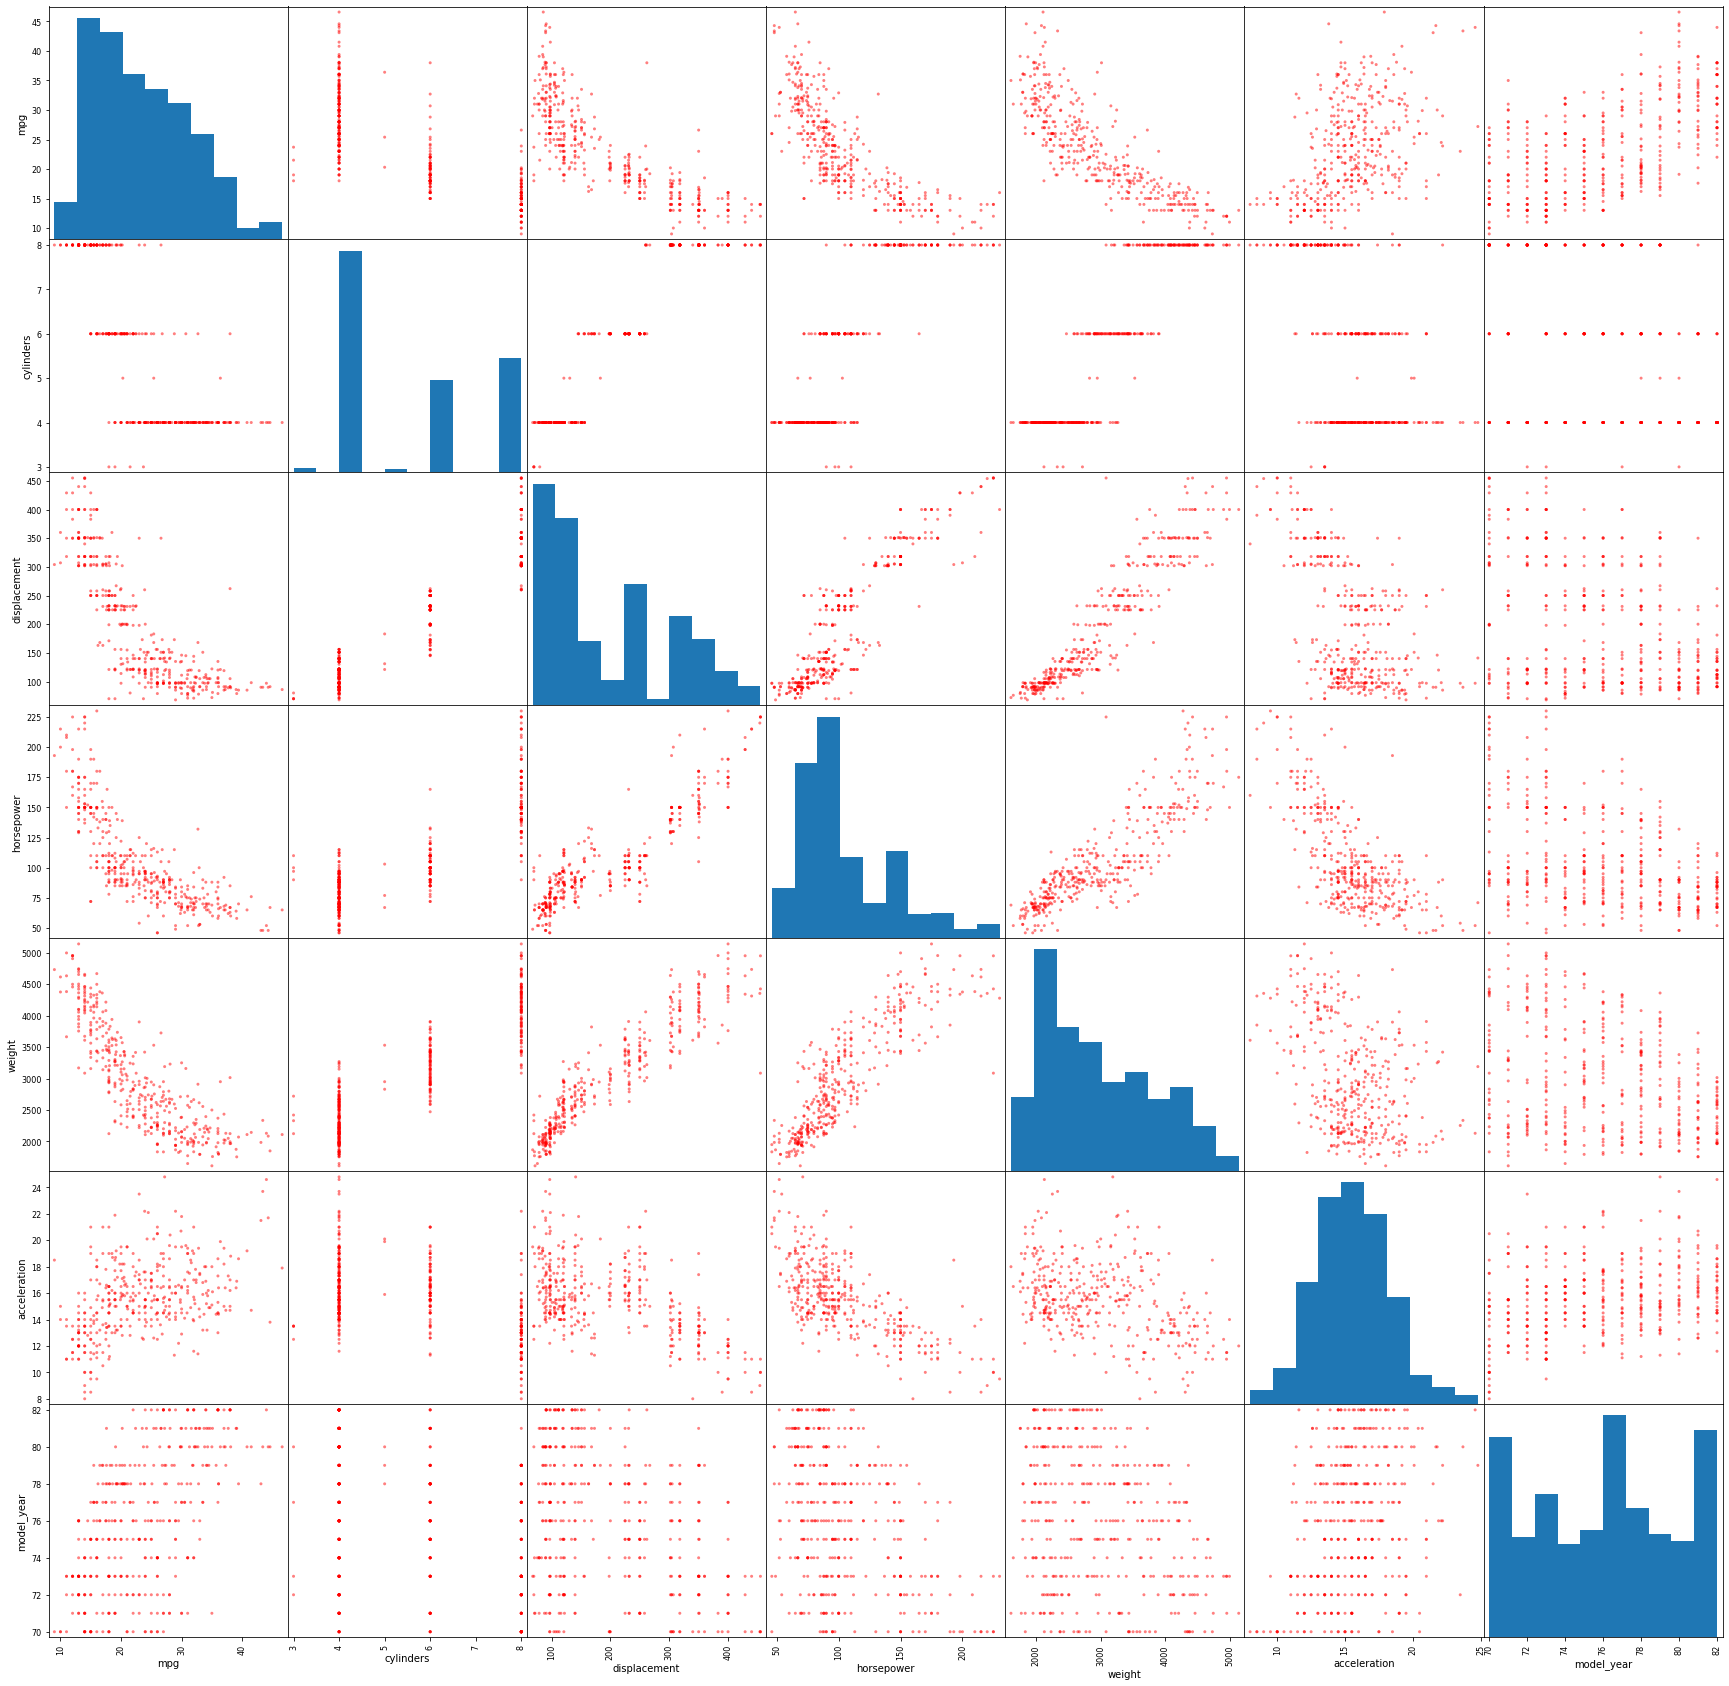

In [103]:
attributes = cars.columns
pd.plotting.scatter_matrix(cars[attributes], figsize=(30,30), color='r');

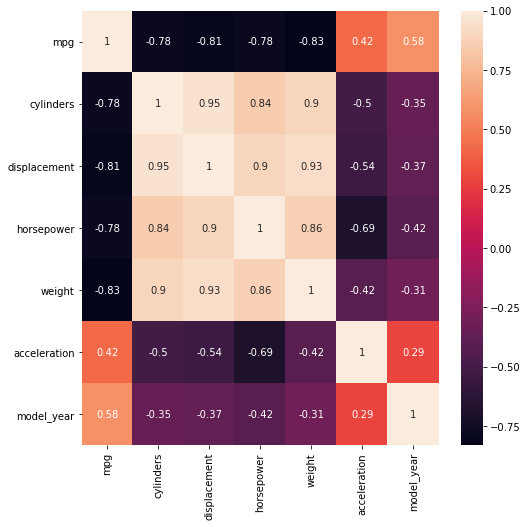

In [104]:
corr_matrix = cars.corr()
fig, ax= plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True)

Very high correlation between cylinders, displacement, horsepower and weight

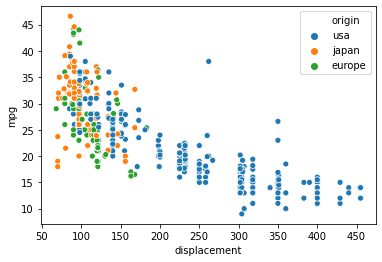

In [140]:
ax=sns.scatterplot(x='displacement', y='mpg', data=cars, hue='origin')

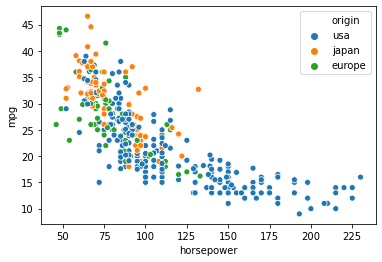

In [145]:
ax=sns.scatterplot(x='horsepower', y='mpg', data=cars, hue='origin')

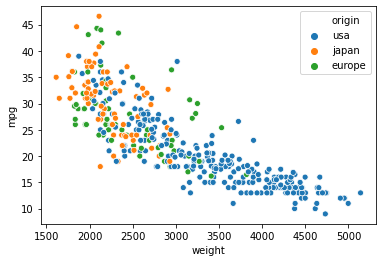

In [146]:
ax=sns.scatterplot(x='weight', y='mpg', data=cars, hue='origin')

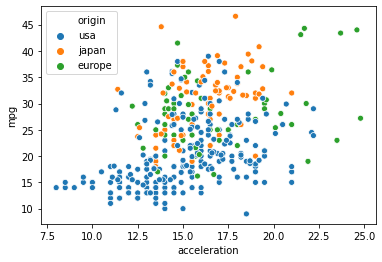

In [147]:
ax=sns.scatterplot(x='acceleration', y='mpg', data=cars, hue='origin')

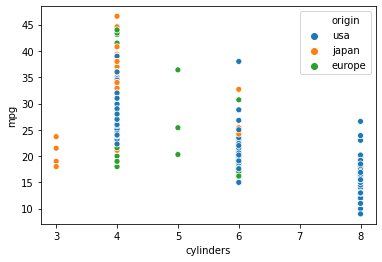

In [148]:
ax=sns.scatterplot(x='cylinders', y='mpg', data=cars, hue='origin')

Due to high correlation between cylinders, horsepower, displacement and weight, dropping cylinders, horsepower, and weight
Rationale behind selecting displacement among the four correlated variable is correlation score. Displacement has highest correlation score with other 3, all >= 0.9.

In [188]:
x_cars = cars.drop(['mpg', 'model_year', 'origin', 'cylinders','horsepower', 'weight' ], axis='columns')
x_cars

,displacement,acceleration
0,307.0,12.0
1,350.0,11.5
2,318.0,11.0
3,304.0,12.0
4,302.0,10.5
...,...,...
393,140.0,15.6
394,97.0,24.6
395,135.0,11.6
396,120.0,18.6


In [189]:
# Reshapping the data
X_data = x_cars.values
X_data.shape

(392, 2)

In [190]:
y_data = cars[['mpg']].values
y_data.shape

(392, 1)

In [191]:
#regression without scalling the values
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))
print(mse(y_test, y_pred))

0.579895458258366
22.225559274968997


In [193]:
#5 fold cv
cv_results = cross_val_score(reg, X_data, y_data, cv=5)
print(cv_results)

[ 0.43269558  0.46334185  0.63050869  0.55026652 -0.83995765]


In [194]:
# regression with scalling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [195]:
steps = [('scaler', StandardScaler()), ('reg', LinearRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
reg_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(reg.score(X_test, y_test))
print(mse(y_test, y_pred))

0.579895458258366
22.225559274968994


In [196]:
#5 fold cv
cv_results = cross_val_score(reg, X_data, y_data, cv=5)
print(cv_results)

[ 0.43269558  0.46334185  0.63050869  0.55026652 -0.83995765]


In [197]:
#no impact of scalling the data on final accuracy score, we will start addinng other variables one at a time
# adding cylinders
x_cars = cars.drop(['mpg', 'model_year', 'origin','horsepower', 'weight' ], axis='columns')
x_cars

,cylinders,displacement,acceleration
0,8,307.0,12.0
1,8,350.0,11.5
2,8,318.0,11.0
3,8,304.0,12.0
4,8,302.0,10.5
...,...,...,...
393,4,140.0,15.6
394,4,97.0,24.6
395,4,135.0,11.6
396,4,120.0,18.6


In [198]:
# Reshapping the data
X_data = x_cars.values
X_data.shape

(392, 3)

In [199]:
y_data = cars[['mpg']].values
y_data.shape

(392, 1)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))
print(mse(y_test, y_pred))

0.5839626884544413
22.0103831537277


In [201]:
#5 fold cv
cv_results = cross_val_score(reg, X_data, y_data, cv=5)
print(cv_results)

[ 0.43530097  0.46836376  0.63143322  0.53260341 -0.82933599]


In [202]:
#adding horsepower
x_cars = cars.drop(['mpg', 'model_year', 'origin', 'weight' ], axis='columns')
x_cars

,cylinders,displacement,horsepower,acceleration
0,8,307.0,130.0,12.0
1,8,350.0,165.0,11.5
2,8,318.0,150.0,11.0
3,8,304.0,150.0,12.0
4,8,302.0,140.0,10.5
...,...,...,...,...
393,4,140.0,86.0,15.6
394,4,97.0,52.0,24.6
395,4,135.0,84.0,11.6
396,4,120.0,79.0,18.6


In [203]:
# Reshapping the data
X_data = x_cars.values
X_data.shape

(392, 4)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))
print(mse(y_test, y_pred))

0.6016313469038514
21.075625785838888


In [205]:
#5 fold cv
cv_results = cross_val_score(reg, X_data, y_data, cv=5)
print(cv_results)

[ 0.42280665  0.41370854  0.65694763  0.61110334 -0.7283059 ]


In [208]:
#adding weight
x_cars = cars.drop(['mpg', 'model_year', 'origin'], axis='columns')
x_cars

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5
...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6
394,4,97.0,52.0,2130,24.6
395,4,135.0,84.0,2295,11.6
396,4,120.0,79.0,2625,18.6


In [209]:
# without scalling
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))
print(mse(y_test, y_pred))

0.6016313469038514
21.075625785838888


In [210]:
#5 fold cv
cv_results = cross_val_score(reg, X_data, y_data, cv=5)
print(cv_results)

[ 0.42280665  0.41370854  0.65694763  0.61110334 -0.7283059 ]


# No significant impact of adding new variable
R-square moved from 0.58 to 0.60, thus adding new variable wasn't much of a help in improving the overall overall r-square. This can further be explained due to very-high correlation between the vaiables, leading to multi-colinearity.

# Linear Regression with dummy variables
Earlier I dropped origin column, now will try and run dummy variable linear regression 

In [215]:
# Loading data as cars
cars = pd.read_csv('E:/Analytics/DataCamp/Data Scientist/Datasets/Cars_Evaluation/mpg.csv')
cars.dropna(axis=0,inplace=True)
cars.drop(['name', 'model_year'], axis='columns', inplace=True)
cars_origin = pd.get_dummies(cars)
print(cars_origin.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   origin_europe  origin_japan  origin_usa  
0              0             0           1  
1              0             0           1  
2              0             0           1  
3              0             0           1  
4              0             0           1  


In [216]:
# Encoding Dummy Variables
cars_origin = cars_origin.drop('origin_europe', axis=1)
print(cars_origin.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   origin_japan  origin_usa  
0             0           1  
1             0           1  
2             0           1  
3             0           1  
4             0           1  


In [217]:
X_origin_data = cars_origin.drop('mpg', axis='columns').values
X_origin_data.shape

(392, 7)

In [219]:
y_origin_data = cars_origin[['mpg']].values
y_origin_data.shape

(392, 1)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X_origin_data, y_origin_data, test_size=0.3, random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))
print(mse(y_test, y_pred))

0.6621301913272133
17.87494471911168


In [223]:
#5 fold cv
cv_results = cross_val_score(reg, X_origin_data, y_origin_data, cv=5)
print(cv_results)

[ 0.53662432  0.37560475  0.75705171  0.63858513 -0.57101522]


# Conclusion
Including origin turned out to be a good option to improve the r-square of the model.

I'm still learning and very much open for suggestions to improve the model. Thank you.